In [1]:
from extras.helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [2]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [3]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [4]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [6]:
for images,labels in train_data_10_percent.take(1):
    print(images,labels)

tf.Tensor(
[[[[ 56.913265   57.913265   41.913265 ]
   [ 53.882652   54.882652   38.882652 ]
   [ 54.5        55.5        37.5      ]
   ...
   [ 73.56634    50.270344   12.484609 ]
   [ 76.47451    47.668373    9.071442 ]
   [ 79.93879    49.224503   11.224504 ]]

  [[ 55.382652   56.382652   40.382652 ]
   [ 56.780613   57.780613   41.780613 ]
   [ 57.90306    58.90306    40.90306  ]
   ...
   [ 61.714264   41.800972    5.484564 ]
   [ 70.576584   46.556183    8.219415 ]
   [ 76.688736   51.474453   11.142788 ]]

  [[ 65.0051     63.005104   48.005104 ]
   [ 59.714287   57.714287   42.714287 ]
   [ 53.142857   52.142857   34.05102  ]
   ...
   [ 53.57149    39.42861    12.188748 ]
   [ 63.83169    45.74497    13.403096 ]
   [ 75.70931    56.56646    21.433752 ]]

  ...

  [[204.51529   205.51529   173.87242  ]
   [205.22968   206.22968   172.37253  ]
   [200.68376   202.61739   169.09189  ]
   ...
   [189.64279   189.42853   161.33672  ]
   [190.71423   191.49997   161.14276  ]
   [1

In [7]:
#004 Discussing the four (actually five) modelling experiments we're running
#005 Comparing the TensorFlow Keras Sequential API versus the Functional API
#006 Creating our first model with the TensorFlow Keras Functional API
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
#If using Resnet50V2 - we need to normalize - if the model tends to not learn anything maybe try normalizing it
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x= base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")
outputs  = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_0 = tf.keras.Model(inputs,outputs )

#007 Compiling and fitting our first Functional API model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_feature_extraction")])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20240107-115345
Epoch 1/5
24/24 [==============================] - 22s 449ms/step - loss: 1.8415 - accuracy: 0.4467 - val_loss: 1.2747 - val_accuracy: 0.7418
Epoch 2/5
24/24 [==============================] - 4s 168ms/step - loss: 1.0830 - accuracy: 0.7653 - val_loss: 0.8542 - val_accuracy: 0.8289
Epoch 3/5
24/24 [==============================] - 5s 206ms/step - loss: 0.7795 - accuracy: 0.8333 - val_loss: 0.7004 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 5s 208ms/step - loss: 0.6357 - accuracy: 0.8600 - val_loss: 0.5795 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 7s 249ms/step - loss: 0.5301 - accuracy: 0.8893 - val_loss: 0.5518 - val_accuracy: 0.8668


In [8]:
model_0.evaluate(test_data)

79/79 [==============================] - 10s 119ms/step - loss: 0.5544 - accuracy: 0.8636


[0.5543866157531738, 0.8636000156402588]

In [9]:
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [10]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


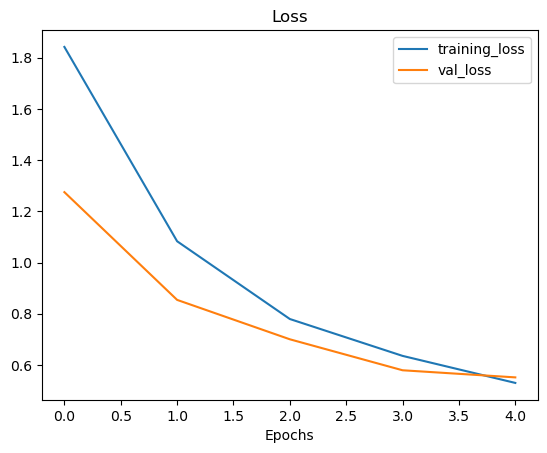

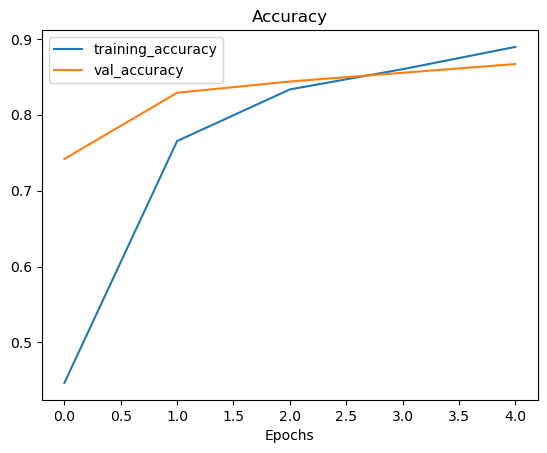

In [11]:
plot_loss_curves(history=history_10_percent)

In [12]:
#008 Getting a feature vector from our trained model
#demostrate GlobalAvgPoolingLayer2D
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor :\n {input_tensor}\n")

#pass tensor through GlobalAvgPoolingLayer2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled randon tensor:\n {global_average_pooled_tensor}\n")

# check shape of tensors
print(f"shape of input tensor: {input_tensor.shape}")
print(f"shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor :
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled randon tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

shape of input tensor: (1, 4, 4, 3)
shape of Global Average Pooled 2D tensor: (1, 3)


In [13]:
# replicating the layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [14]:
#009 Drilling into the concept of a feature vector (a learned representation)
#010 Downloading and preparing the data for Model 1 (1 percent of training data)
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [15]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [16]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
#011 Building a data augmentation layer to use inside our model

# data augmentation in preporocessing layers only turns on during training
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    #tf.keras.layers.experimental.preprocessing.Rescaling(1./255) #ResNet50V2 needs this but efficientnet has it
],name="data_augmentation")

(-0.5, 518.5, 331.5, -0.5)

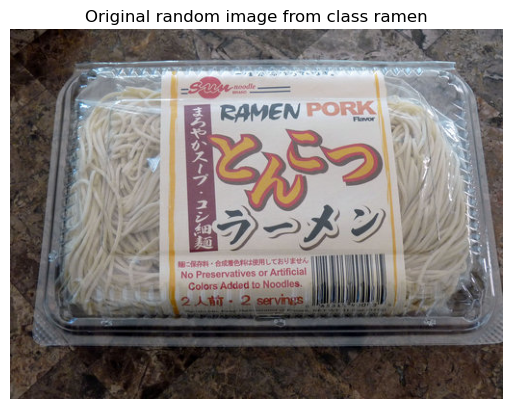

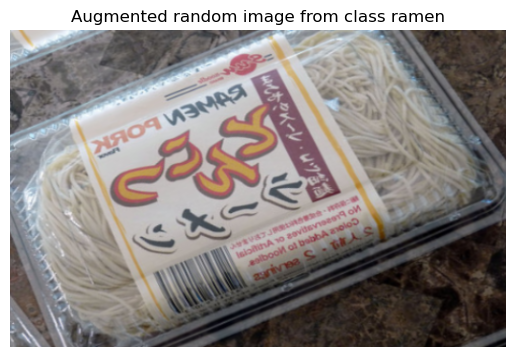

In [42]:
#013 Visualizing what happens when images pass through our data augmentation layer
#visualize our data augmentation layer
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir((target_dir)))
random_image_path = target_dir+"/"+random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

#Now augment this image and plot
augmented_img = data_augmentation(tf.expand_dims(img,axis=0),training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)

In [43]:
#014 Building Model 1 (with a data augmentation layer and 1% of training data)
#Model1 : Feture extraction transfer learning on 1% of data with data augmentation
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)

x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
model_1 = tf.keras.Model(inputs,outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics = ["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch=len(train_data_1_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240107-132708
Epoch 1/5
3/3 [==============================] - 10s 1s/step - loss: 2.3931 - accuracy: 0.1286 - val_loss: 2.2507 - val_accuracy: 0.1431
Epoch 2/5
3/3 [==============================] - 2s 904ms/step - loss: 2.1367 - accuracy: 0.2429 - val_loss: 2.1346 - val_accuracy: 0.2072
Epoch 3/5
3/3 [==============================] - 2s 906ms/step - loss: 1.9474 - accuracy: 0.4000 - val_loss: 2.0431 - val_accuracy: 0.2895
Epoch 4/5
3/3 [==============================] - 2s 898ms/step - loss: 1.7734 - accuracy: 0.5143 - val_loss: 1.9384 - val_accuracy: 0.3684
Epoch 5/5
3/3 [==============================] - 2s 911ms/step - loss: 1.6620 - accuracy: 0.5714 - val_loss: 1.8524 - val_accuracy: 0.4227


In [44]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 512, 3)           0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [45]:
#Evaluate on full image dataset
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 77ms/step - loss: 1.8527 - accuracy: 0.4196


[1.852736473083496, 0.4196000099182129]

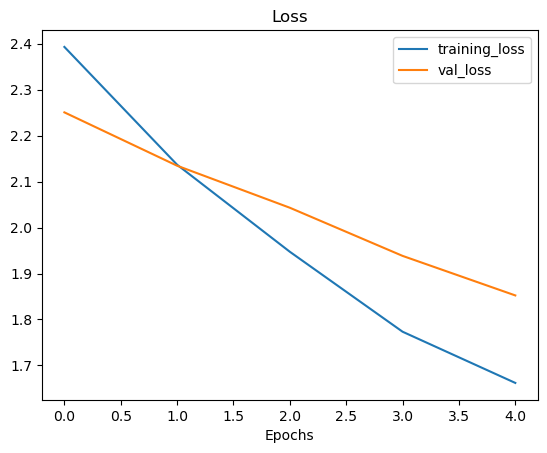

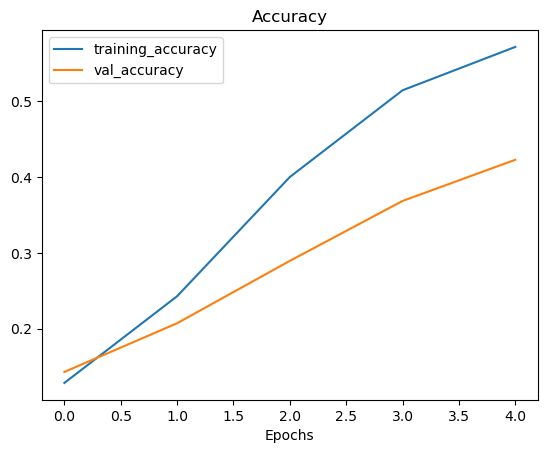

In [46]:
plot_loss_curves(history_1_percent)

In [48]:
#015 Building Model 2 (with a data augmentation layer and 10% of training data)
# Model 2 : feature extraction transfer learning with 10% data
train_dir_10_percent = "10_food_classes_10_percent/train"
teat_dir = "10_food_classes_10_percent/test"


In [49]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,label_mode="categorical",image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [54]:
from keras import layers
from keras.layers import preprocessing
from keras.models import Sequential

data_augmentation = Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
],name = "data_augmentation")

input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape,name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="Global_averagre_pooling_2D")(x)
outputs = layers.Dense(10,activation="softmax",name= "output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [56]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_averagre_pooling_2D   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [57]:
#016 Creating a ModelCheckpoint to save our model's weights during training
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=False,save_freq="epoch",verbose=1)

In [58]:
#017 Fitting and evaluating Model 2 (and saving its weights using ModelCheckpoint)
#Fit model 2 passing in the model checkpoint callback
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,epochs=initial_epochs,validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_data_aug"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240107-155417
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9558 - accuracy: 0.3640
Epoch 1: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 14s 327ms/step - loss: 1.9558 - accuracy: 0.3640 - val_loss: 1.4129 - val_accuracy: 0.7007
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2842 - accuracy: 0.6880
Epoch 2: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 7s 275ms/step - loss: 1.2842 - accuracy: 0.6880 - val_loss: 0.9495 - val_accuracy: 0.8240
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9738 - accuracy: 0.7880
Epoch 3: saving model to ten_percent_model_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 7s 275ms/step - loss: 0.9738 - accuracy: 0.7880 - val_loss: 0.7527 - val_accuracy: 0.8421
Epo

In [59]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.5544 - accuracy: 0.8636


[0.5543869733810425, 0.8636000156402588]

In [60]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 0.6165 - accuracy: 0.8416


[0.6164602637290955, 0.8416000008583069]

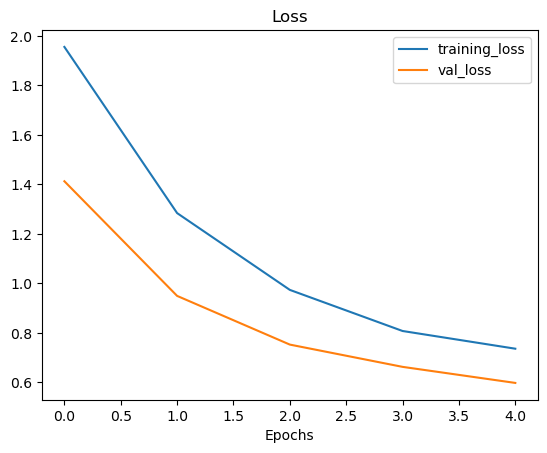

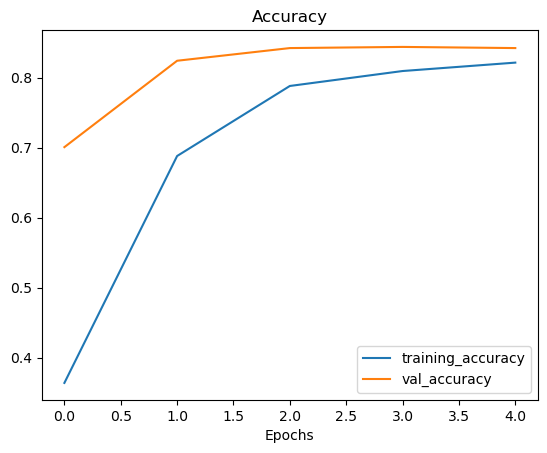

In [61]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
#018 Loading and comparing saved weights to our existing trained Model 2
